# Interactive Data Visualization

Working on the course project during Week 02. Data wrangling and visualization experiments that will be described in more detail in the learning diary that is this week's core deliverable.

In [6]:
# Import Python modules we need to work with the data.

import numpy as np
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)

## Data wrangling with Pandas

Process the COVID-19 data from JHU with Pandas to timeseries that are easy to visualize. The format in which the data is delivered where the timeseries are presented in columns instead of rows requires a bit of pivoting for the data.

In [135]:
# Setup the dataframe with COVID-19 data, and clean the data.

datasource = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(datasource)

df = df.drop(columns=["Lat", "Long"])  # clean out spatial location columns we don't need
df = df[df['Province/State'].isna()].drop(columns=['Province/State'])  # FIXME: Cleaning out countries with regional data; removes e.g. Canada and Australia
df = df.set_index('Country/Region')  # use the country as the index to make transpose work nice
df = df.transpose()  # transpose rows/columns to give nicely plottable data
df.index = pd.to_datetime(df.index)  # make the index proper Python 'datetime' for nicer plotting
df.columns.name = 'Country'  # make the index name nicer

data = df[['Germany', 'Italy', 'France', 'Spain']]  # select the country subset

**Let's try to do plots with vanilla Matplotlib and Seaborne**

Using four European countries with similar COVID-19 trajectory to make the plots nice.

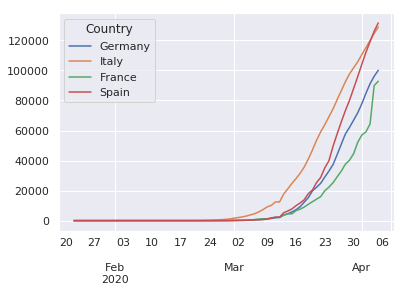

In [137]:
# Vanilla plot with Matplotlib. Looks already pretty alright.

plot = data.plot()

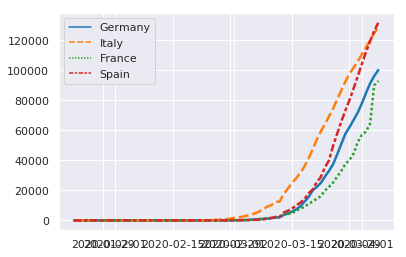

In [129]:
# Plot the data with Seaborn. Looks quite nice but the dates do not look very nice.

plot = sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## Plotly experiments

Experimenting with the Plotly library for Python that makes creation interactive visualizations a breeze. Idea is to develop the visualizations with Pandas and then convert them to "programmable visualizations" with Seaborn, and more "point and click" interactive with Plotly.

In [65]:
# Experimenting with simple Plotly visualizations from the library's documentation.

# FIXME: Seems that the Plotly Express library is not as standard with Debian and
# won't be setting up a separate virtualenv now for this phase of the project.

# import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")
# fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
# fig.show()